In [1]:
##### Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from keras import layers
from keras.models import Model

##### Load and Preprocess Dataset

data = pd.read_csv("/content/ner_dataset.csv", encoding="latin1")
data.head()
data = data.fillna(method="ffill")
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())
words=list(data['Word'].unique())
words.append("ENDPAD")
num_words = len(words)
tags=list(data['Tag'].unique())
num_tags = len(tags)
print("Unique tags are:", tags)

##### Define Sentence Getter Class

class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func=lambda s:[(w,p,t)for w,p,t in zip(s["Word"].values.tolist(),
                        s["POS"].values.tolist(),s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

##### Create Index Dictionaries and Prepare Data

getter = SentenceGetter(data)
sentences = getter.sentences
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
X1 = [[word2idx[w[0]] for w in s] for s in sentences]

##### Pad Sequences and Split Data into Train/Test Sets

X = sequence.pad_sequences(maxlen=100,sequences=X1, padding="post",value=num_words-1)
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]
Y = sequence.pad_sequences(maxlen=max_len,sequences=y1,padding="post",value=tag2idx["O"])
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

##### Build the LSTM Model Architecture

input_word = layers.Input(shape=(max_len,))
embedding_layer = layers.Embedding(input_dim=num_words,output_dim=50,
                  input_length=max_len)(input_word)
dropout = layers.SpatialDropout1D(0.1)(embedding_layer)
bid_lstm = layers.Bidirectional(layers.LSTM(units=100,
              return_sequences=True,recurrent_dropout=0.1))(dropout)
output = layers.TimeDistributed(layers.Dense(num_tags,activation="softmax"))(bid_lstm)
model = Model(input_word, output)
model.summary()

##### Compile and Train the Model

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x=Xtrain, y=ytrain, validation_data=(Xtest,ytest),batch_size=50,epochs=3,)

##### Evaluate Model Performance and Plot Metrics

metrics = pd.DataFrame(model.history.history)
metrics[['accuracy','val_accuracy']].plot()
plt.title('Training Accuracy vs. Validation Accuracy')
metrics[['loss','val_loss']].plot()
plt.title('Training Loss vs. Validation Loss')

##### Make Predictions and Display Results

i = 21
p = model.predict(np.array([Xtest[i]]))
p = np.argmax(p, axis=-1)
ytrue = ytest[i]
print("SASIDEVI V - 212222230136")
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(Xtest[i], ytrue, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

<ipython-input-1-93046c297440>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


Unique words in corpus: 35177
Unique tags in corpus: 17
Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


<ipython-input-1-93046c297440>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence #").apply(agg_func)


NameError: name 'max_len' is not defined

<ipython-input-3-3224e690527e>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


Unique words in corpus: 35177
Unique tags in corpus: 17
Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


<ipython-input-3-3224e690527e>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence #").apply(agg_func)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 50)             │       1,758,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 200)            │         120,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 100, 17)             │           3,417 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,883,117 (7.18 MB)

 Trainable params: 1,883,117 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
768/768 ━━━━━━━━━━━━━━━━━━━━ 381s 483ms/step - accuracy: 0.9608 - loss: 0.2304 - val_accuracy: 0.9887 - val_loss: 0.0417
Epoch 2/3
768/768 ━━━━━━━━━━━━━━━━━━━━ 365s 476ms/step - accuracy: 0.9906 - loss: 0.0337 - val_accuracy: 0.9919 - val_loss: 0.0275
Epoch 3/3
768/768 ━━━━━━━━━━━━━━━━━━━━ 381s 475ms/step - accuracy: 0.9935 - loss: 0.0221 - val_accuracy: 0.9928 - val_loss: 0.0243
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
SASIDEVI V - 212222230136
Word           True 	 Pred

------------------------------
On             O	O
Tuesday        B-tim	B-tim
,              O	O
Lebanon        B-geo	B-geo
's             O	O
ambassador     O	O
to             O	O
the            O	O
United         B-geo	B-geo
States         I-geo	I-geo
,              O	O
Imad           B-geo	B-geo
Moustapha      I-geo	I-geo
,              O	O
said           O	O
the            O	O
troop          O	O
pullout        O	O
would          O	O
be             O	O
complete       O	O
long           O	O
before         O	O
M

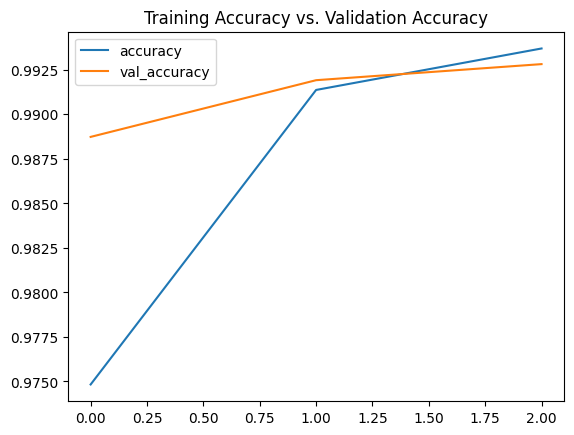

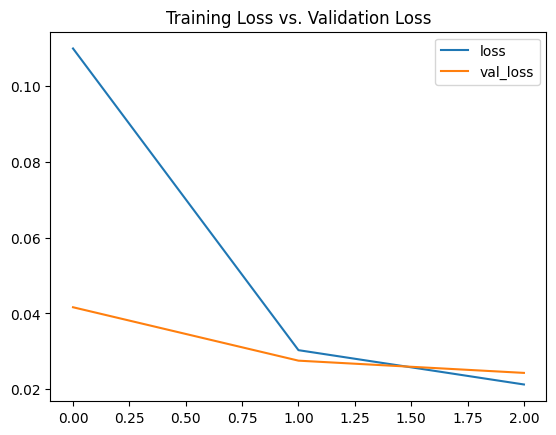

In [3]:
##### Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from keras import layers
from keras.models import Model

##### Load and Preprocess Dataset

data = pd.read_csv("/content/ner_dataset.csv", encoding="latin1")
data.head()
data = data.fillna(method="ffill")
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())
words=list(data['Word'].unique())
words.append("ENDPAD")
num_words = len(words)
tags=list(data['Tag'].unique())
num_tags = len(tags)
print("Unique tags are:", tags)

##### Define Sentence Getter Class

class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func=lambda s:[(w,p,t)for w,p,t in zip(s["Word"].values.tolist(),
                        s["POS"].values.tolist(),s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

##### Create Index Dictionaries and Prepare Data

getter = SentenceGetter(data)
sentences = getter.sentences
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}
X1 = [[word2idx[w[0]] for w in s] for s in sentences]

##### Pad Sequences and Split Data into Train/Test Sets

# Define max_len here
max_len = 100  # You can adjust this value as needed

X = sequence.pad_sequences(maxlen=max_len,sequences=X1, padding="post",value=num_words-1)
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]
Y = sequence.pad_sequences(maxlen=max_len,sequences=y1,padding="post",value=tag2idx["O"])
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

##### Build the LSTM Model Architecture

input_word = layers.Input(shape=(max_len,))
embedding_layer = layers.Embedding(input_dim=num_words,output_dim=50,
                  input_length=max_len)(input_word)
dropout = layers.SpatialDropout1D(0.1)(embedding_layer)
bid_lstm = layers.Bidirectional(layers.LSTM(units=100,
              return_sequences=True,recurrent_dropout=0.1))(dropout)
output = layers.TimeDistributed(layers.Dense(num_tags,activation="softmax"))(bid_lstm)
model = Model(input_word, output)
model.summary()

##### Compile and Train the Model

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x=Xtrain, y=ytrain, validation_data=(Xtest,ytest),batch_size=50,epochs=3,)

##### Evaluate Model Performance and Plot Metrics

metrics = pd.DataFrame(model.history.history)
metrics[['accuracy','val_accuracy']].plot()
plt.title('Training Accuracy vs. Validation Accuracy')
metrics[['loss','val_loss']].plot()
plt.title('Training Loss vs. Validation Loss')

##### Make Predictions and Display Results

i = 21
p = model.predict(np.array([Xtest[i]]))
p = np.argmax(p, axis=-1)
ytrue = ytest[i]
print("SASIDEVI V - 212222230136")
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(Xtest[i], ytrue, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))